In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import pylab as plt
import glob
import os
from pprint import pprint
import scipy.integrate as inte
import scipy.special as special
import scipy.interpolate as interp
import scipy.signal as sig

In [3]:
import stephane.display.graphes as graphes
import stephane.tools.Smath as smath

import icewave.tools.datafolders as df
import icewave.tools.rw_data as rw_data

#import sympy #symoblic python
#import mpmath as math
#import cv2
import glob
import csv
import os

import icewave.phone.rw_pyphone as rw

macOS
laita.pmmh-local.espci.fr


In [4]:
base = '/Volumes/Hublot24/Share_hublot/Data/'

savefolder = base+'Summary/Results/'
savefolder_local = '/Users/stephane/Documents/Articles/En_cours/BicWin2024/Summary/Results/'

if not os.path.exists(savefolder):
    os.makedirs(savefolder)
    os.makedirs(savefolder_local)

In [ ]:
folder = '/Volumes/Hublot24/Share_hublot/Data/0221/Drones/bernache/29-frac_001/'
data = rw_data.load_pkl(folder+'record_0221_Bernache_29-frac_001.pkl')
print(data.keys())

In [11]:
filename = '/Volumes/Hublot24/Share_hublot/Data/0221/Summary/records_0221.pkl'

records = rw_data.load_pkl(filename)

In [18]:
record = records['drones']['Bernache']
for key in record.keys():
    print(len(record[key]),key)

1 07-doc_004
1 15-float_001
3 17-doc_010
1 18-calib_001
1 19-calib_002
1 20-calib_003
1 21-calib_004
1 22-doc_011
1 29-frac_001
1 28-stereo_001


['19:03:30', '19:03:34', '19:03:37', '19:03:40', '19:03:44', '19:03:47', '19:03:50', '19:03:54', '19:03:57', '19:04:00', '19:04:04', '19:04:07', '19:04:10', '19:04:14', '19:04:17', '19:04:20', '19:04:24', '19:04:27', '19:04:30', '19:04:34', '19:04:37', '19:04:40', '19:04:44', '19:04:47', '19:04:50', '19:04:54', '19:04:57', '19:05:00']
['19:01:16', '19:01:20', '19:01:23', '19:01:26', '19:01:30', '19:01:33', '19:01:36', '19:01:40', '19:01:43', '19:01:46', '19:01:50', '19:01:53', '19:01:56', '19:02:00', '19:02:03', '19:02:06', '19:02:10', '19:02:13', '19:02:16', '19:02:20', '19:02:23', '19:02:26', '19:02:30', '19:02:33', '19:02:36', '19:02:40']
['19:02:48', '19:02:50', '19:02:52', '19:02:53', '19:02:55', '19:02:57', '19:02:58', '19:03:00', '19:03:02', '19:03:03', '19:03:05', '19:03:07', '19:03:08', '19:03:10', '19:03:12', '19:03:13', '19:03:15', '19:03:17', '19:03:18']


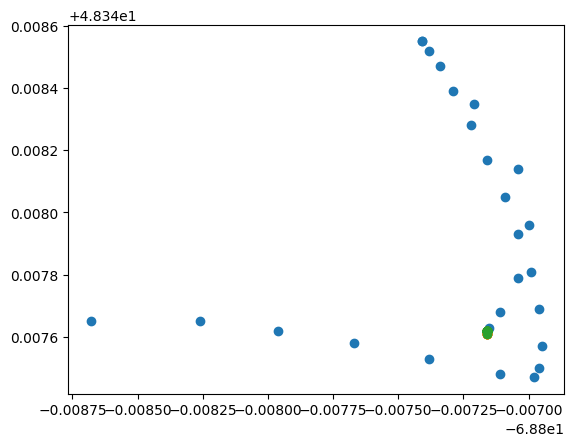

In [27]:
for rec in records['drones']['Bernache']['17-doc_010']:
    plt.plot(rec['longitude'],rec['latitude'],'o')
    print(rec['time'])

In [6]:
# look for .SRT files of drone
date = '0223'
srtfiles_mesange = glob.glob(base+date+'/Drones/mesange/*/*.SRT')#/*/*.srt')
srtfiles_bernache = glob.glob(base+date+'/Drones/Bernache/*/*.SRT')#/*/*.srt')

pprint(srtfiles_mesange)

['/Volumes/Hublot24/Share_hublot/Data/0223/Drones/mesange/04-waves_001/DJI_20240223172423_0469_D.SRT',
 '/Volumes/Hublot24/Share_hublot/Data/0223/Drones/mesange/05-doc_003/DJI_20240223172840_0470_D.SRT',
 '/Volumes/Hublot24/Share_hublot/Data/0223/Drones/mesange/06-waves_002/DJI_20240223172954_0471_D.SRT',
 '/Volumes/Hublot24/Share_hublot/Data/0223/Drones/mesange/07-frac+waves_001/DJI_20240223173504_0473_D.SRT',
 '/Volumes/Hublot24/Share_hublot/Data/0223/Drones/mesange/08-waves_003/DJI_20240223173846_0474_D.SRT',
 '/Volumes/Hublot24/Share_hublot/Data/0223/Drones/mesange/10-rheo+waves_001/DJI_20240223174526_0477_D.SRT',
 '/Volumes/Hublot24/Share_hublot/Data/0223/Drones/mesange/10-rheo+waves_001/DJI_20240223174913_0478_D.SRT',
 '/Volumes/Hublot24/Share_hublot/Data/0223/Drones/mesange/11-ortho_002/DJI_20240223175144_0552_D.SRT',
 '/Volumes/Hublot24/Share_hublot/Data/0223/Drones/mesange/12-waves_004/DJI_20240223175826_0785_D.SRT',
 '/Volumes/Hublot24/Share_hublot/Data/0223/Drones/mesange/13

In [7]:
folder = '/Volumes/Hublot24/Share_hublot/Data/0221/Drones/bernache/29-frac_001/'
data = rw_data.load_pkl(folder+'record_0221_Bernache_29-frac_001.pkl')
print(data.keys())

dict_keys(['OSD.altitude [ft]', 'OSD.mileage [ft]', 'OSD.hSpeed [MPH]', 'OSD.xSpeed [MPH]', 'OSD.ySpeed [MPH]', 'OSD.zSpeed [MPH]', 'OSD.pitch', 'OSD.roll', 'OSD.yaw', 'OSD.yaw [360]', 'OSD.gpsNum', 'GIMBAL.pitch', 'GIMBAL.roll', 'GIMBAL.yaw', 'GIMBAL.yaw [360]', 'CUSTOM.date [local]', 'CUSTOM.updateTime [local]', 'CAMERA.isPhoto', 'CAMERA.isVideo'])


In [9]:
data['CUSTOM.updateTime [local]'][0]

'8:18:28.01 PM'

In [12]:
print(np.mean(data['OSD.yaw [360]']),np.std(data['OSD.yaw [360]']))

128.1460490463215 0.17833449205061058


In [13]:
for key in data.keys():
    try:
        print(key,np.mean(data[key]),np.std(data[key]))
    except:
        print(key)

OSD.altitude [ft] 197.0 0.0
OSD.mileage [ft] 119.26103542234331 11.827158144397462
OSD.hSpeed [MPH] 0.01792856403269755 0.061391761426445
OSD.xSpeed [MPH] -0.012190408719346048 0.053394825143708705
OSD.ySpeed [MPH] -0.0012190408719346048 0.03300427933736338
OSD.zSpeed [MPH] 0.0 0.0
OSD.pitch 0.08828337874659395 2.142968743790422
OSD.roll 2.1223433242506813 1.4979702750050679
OSD.yaw 128.1460490463215 0.17833449205061058
OSD.yaw [360] 128.1460490463215 0.17833449205061058
OSD.gpsNum 23.0 0.0
GIMBAL.pitch -90.0 0.0
GIMBAL.roll 0.0 0.0
GIMBAL.yaw 139.9 0.0
GIMBAL.yaw [360] 139.9 0.0
CUSTOM.date [local]
CUSTOM.updateTime [local]
CAMERA.isPhoto 1.0 0.0
CAMERA.isVideo 1.0 0.0


In [15]:
#pprint(d[:6])
#event = d[:6]
#pprint([event[1],event[3],event[4]])

In [124]:
def get_flighrecord(data,step=100):
    n = int(len(data)/6)
    print('number of records : '+str(n))
    record = {}
    for i in range(0,n-1,step):
        event = data[i*6:(i+1)*6]
        if int(event[0][0])==i+1:  
            record[i]={}
            record[i]['record_time']=event[1]
            record[i]['date']=event[3][0].split(' ')[0]
            record[i]['time']=event[3][0].split(' ')[1][:-4]
            params = event[4][0]
            latitude = float(params.split('latitude: ')[1].split(']')[0])
            longitude = float(params.split('longitude: ')[1].split(']')[0])

            #print(event[3],latitude,longitude)
            record[i]['latitude']=latitude
            record[i]['longitude']=longitude
            record[i]['params'] = params
#pprint(d[6:12])
    return record

In [107]:
print(event[3][0].split(' ')[1][:-4])
print(event[3][0].split(' ')[0])

13:03:30
2024-02-23


In [337]:
import icewave.field.drone as drone
date = '0223'
records_drones = drone.get_records(date)


/Volumes/Hublot24/Share_hublot/Data/
['/Volumes/Hublot24/Share_hublot/Data/0223/Drones/mesange/04-waves_001/DJI_20240223172423_0469_D.SRT', '/Volumes/Hublot24/Share_hublot/Data/0223/Drones/mesange/05-doc_003/DJI_20240223172840_0470_D.SRT', '/Volumes/Hublot24/Share_hublot/Data/0223/Drones/mesange/06-waves_002/DJI_20240223172954_0471_D.SRT', '/Volumes/Hublot24/Share_hublot/Data/0223/Drones/mesange/07-frac+waves_001/DJI_20240223173504_0473_D.SRT', '/Volumes/Hublot24/Share_hublot/Data/0223/Drones/mesange/08-waves_003/DJI_20240223173846_0474_D.SRT', '/Volumes/Hublot24/Share_hublot/Data/0223/Drones/mesange/10-rheo+waves_001/DJI_20240223174526_0477_D.SRT', '/Volumes/Hublot24/Share_hublot/Data/0223/Drones/mesange/10-rheo+waves_001/DJI_20240223174913_0478_D.SRT', '/Volumes/Hublot24/Share_hublot/Data/0223/Drones/mesange/11-ortho_002/DJI_20240223175144_0552_D.SRT', '/Volumes/Hublot24/Share_hublot/Data/0223/Drones/mesange/12-waves_004/DJI_20240223175826_0785_D.SRT', '/Volumes/Hublot24/Share_hublot

number of records : 6734
12 /Volumes/Hublot24/Share_hublot/Data/0223/Drones/mesange/17-waves_007/DJI_20240223181757_0948_D.SRT
number of records : 798
13 /Volumes/Hublot24/Share_hublot/Data/0223/Drones/mesange/18-waves_008/DJI_20240223182218_0950_D.SRT
number of records : 646
14 /Volumes/Hublot24/Share_hublot/Data/0223/Drones/mesange/18-waves_008/DJI_20240223181831_0949_D.SRT
number of records : 6802
15 /Volumes/Hublot24/Share_hublot/Data/0223/Drones/mesange/19-canot_001/DJI_20240223182247_0951_D.SRT
number of records : 2815
16 /Volumes/Hublot24/Share_hublot/Data/0223/Drones/mesange/20-frac+waves_002/DJI_20240223182550_0952_D.SRT
number of records : 2616
17 /Volumes/Hublot24/Share_hublot/Data/0223/Drones/mesange/21-waves_009/DJI_20240223182831_0954_D.SRT
number of records : 5457
18 /Volumes/Hublot24/Share_hublot/Data/0223/Drones/mesange/23_waves_010/DJI_20240223183314_0957_D.SRT
number of records : 6726
19 /Volumes/Hublot24/Share_hublot/Data/0223/Drones/mesange/24-doc_005/DJI_202402231

In [348]:
import icewave.field.phone as phone
date = '0223'
records_phones = phone.get_records(date)

/Volumes/Hublot24/Share_hublot/Data/0223/Telephones/Bic24_S02_2024_0223/averages_Summary.csv
dict_keys(['Phone', 'ax_err', 'ax_w_mean', 'ax_high_mean', 'ax_trend_mean', 'ax_w_std', 'ax_high_std', 'ax_trend_std', 'ay_err', 'ay_w_mean', 'ay_high_mean', 'ay_trend_mean', 'ay_w_std', 'ay_high_std', 'ay_trend_std', 'az_err', 'az_w_mean', 'az_high_mean', 'az_trend_mean', 'az_w_std', 'az_high_std', 'az_trend_std', 'gx_err', 'gx_w_std', 'gx_high_std', 'gx_trend_std', 'gy_err', 'gy_w_std', 'gy_high_std', 'gy_trend_std', 'gz_err', 'gz_w_std', 'gz_high_std', 'gz_trend_std', 'mx_err', 'mx_w_mean', 'mx_high_mean', 'mx_trend_mean', 'mx_w_std', 'mx_high_std', 'mx_trend_std', 'my_err', 'my_w_mean', 'my_high_mean', 'my_trend_mean', 'my_w_std', 'my_high_std', 'my_trend_std', 'mz_err', 'mz_w_mean', 'mz_high_mean', 'mz_trend_mean', 'mz_w_std', 'mz_high_std', 'mz_trend_std', 'az_w_freq', 'elev_mean', 'elev_std', 'lat_mean', 'lat_std', 'lon_mean', 'lon_std', 'time_start', 'time_end'])
dict_keys(['Phone', 'ax

In [370]:
import icewave.field.geophone as geo
records_geo = geo.get_records(date)

/Volumes/Hublot24/Share_hublot/Data/0223/Geophones/DigiSolo_4075.txt
/Volumes/Hublot24/Share_hublot/Data/0223/Geophones/DigiSolo_4177.txt
/Volumes/Hublot24/Share_hublot/Data/0223/Geophones/DigiSolo_4180.txt
/Volumes/Hublot24/Share_hublot/Data/0223/Geophones/DigiSolo_4265.txt
/Volumes/Hublot24/Share_hublot/Data/0223/Geophones/DigiSolo_4274.txt
/Volumes/Hublot24/Share_hublot/Data/0223/Geophones/DigiSolo_4514.txt
/Volumes/Hublot24/Share_hublot/Data/0223/Geophones/DigiSolo_4765.txt
/Volumes/Hublot24/Share_hublot/Data/0223/Geophones/DigiSolo_5132.txt
/Volumes/Hublot24/Share_hublot/Data/0223/Geophones/DigiSolo_5137.txt
/Volumes/Hublot24/Share_hublot/Data/0223/Geophones/DigiSolo_5165.txt
/Volumes/Hublot24/Share_hublot/Data/0223/Geophones/DigiSolo_5167.txt
/Volumes/Hublot24/Share_hublot/Data/0223/Geophones/DigiSolo_5235.txt
/Volumes/Hublot24/Share_hublot/Data/0223/Geophones/DigiSolo_5251.txt
/Volumes/Hublot24/Share_hublot/Data/0223/Geophones/DigiSolo_5291.txt
/Volumes/Hublot24/Share_hublot/Dat

In [371]:
records_geo['geophones'].keys()

dict_keys(['4075', '4177', '4180', '4265', '4274', '4514', '4765', '5132', '5137', '5165', '5167', '5235', '5251', '5291', '5442', '5450'])

In [372]:
records_geo['geophones']['4075'][14].keys()

dict_keys(['date', 'time', 'latitude', 'longitude'])

In [ ]:
records_geo['geophones']['4075'][14].keys()

In [374]:
records_geo['geophones']['4075'][14]['longitude']

[-68.851119333,
 -68.851119667,
 -68.851122333,
 -68.851118167,
 -68.8511195,
 -68.8511175,
 -68.851118,
 -68.851116167,
 -68.8511085,
 -68.851106333]

In [354]:
records_phones['phone'][0][0]['time']#.keys()

['18:47:40', '19:38:08']

In [378]:
record_buoys.keys()
records_phones.keys()

record_buoys+records_phones

TypeError: unsupported operand type(s) for +: 'dict' and 'dict'

In [357]:
records_phones['phone'][0][0]['time']#.keys()

['18:47:40', '19:38:08']

In [125]:
records_b = []
for i,srtfile in enumerate(srtfiles_bernache):
    print(i,srtfile)
    data = rw_data.read_csv(srtfile)
    record = get_flighrecord(data)
    records_b.append(record)

0 /Volumes/Hublot24/Share_hublot/Data/0223/Drones/Bernache/16-waves_011/DJI_20240223125950_0097_D.SRT
number of records : 6614
1 /Volumes/Hublot24/Share_hublot/Data/0223/Drones/Bernache/17-waves_012/DJI_20240223130751_0099_D.SRT
number of records : 715
2 /Volumes/Hublot24/Share_hublot/Data/0223/Drones/Bernache/17-waves_012/DJI_20240223130403_0098_D.SRT
number of records : 6802
3 /Volumes/Hublot24/Share_hublot/Data/0223/Drones/Bernache/18-doc_002/DJI_20240223130816_0100_D.SRT
number of records : 6294
4 /Volumes/Hublot24/Share_hublot/Data/0223/Drones/Bernache/20-waves_013/DJI_20240223131939_0141_D.SRT
number of records : 6224
5 /Volumes/Hublot24/Share_hublot/Data/0223/Drones/Bernache/21-waves_014/DJI_20240223133416_0142_D.SRT
number of records : 5421
6 /Volumes/Hublot24/Share_hublot/Data/0223/Drones/Bernache/22-waves_015/DJI_20240223134119_0144_D.SRT
number of records : 1310
7 /Volumes/Hublot24/Share_hublot/Data/0223/Drones/Bernache/22-waves_015/DJI_20240223133732_0143_D.SRT
number of re

In [126]:
srtfile = srtfiles[0]
records_m = []
for i,srtfile in enumerate(srtfiles_mesange):
    print(i,srtfile)
    data = rw_data.read_csv(srtfile)
    record = get_flighrecord(data)
    records_m.append(record)

0 /Volumes/Hublot24/Share_hublot/Data/0223/Drones/mesange/04-waves_001/DJI_20240223172423_0469_D.SRT
number of records : 5418
1 /Volumes/Hublot24/Share_hublot/Data/0223/Drones/mesange/05-doc_003/DJI_20240223172840_0470_D.SRT
number of records : 803
2 /Volumes/Hublot24/Share_hublot/Data/0223/Drones/mesange/06-waves_002/DJI_20240223172954_0471_D.SRT
number of records : 5422
3 /Volumes/Hublot24/Share_hublot/Data/0223/Drones/mesange/07-frac+waves_001/DJI_20240223173504_0473_D.SRT
number of records : 5537
4 /Volumes/Hublot24/Share_hublot/Data/0223/Drones/mesange/08-waves_003/DJI_20240223173846_0474_D.SRT
number of records : 5666
5 /Volumes/Hublot24/Share_hublot/Data/0223/Drones/mesange/10-rheo+waves_001/DJI_20240223174526_0477_D.SRT
number of records : 6803
6 /Volumes/Hublot24/Share_hublot/Data/0223/Drones/mesange/10-rheo+waves_001/DJI_20240223174913_0478_D.SRT
number of records : 966
7 /Volumes/Hublot24/Share_hublot/Data/0223/Drones/mesange/11-ortho_002/DJI_20240223175144_0552_D.SRT
number

In [127]:

def convert(t):
    h,m,s = t.split(':')
    return int(h)*3600+int(m)*60+int(s)


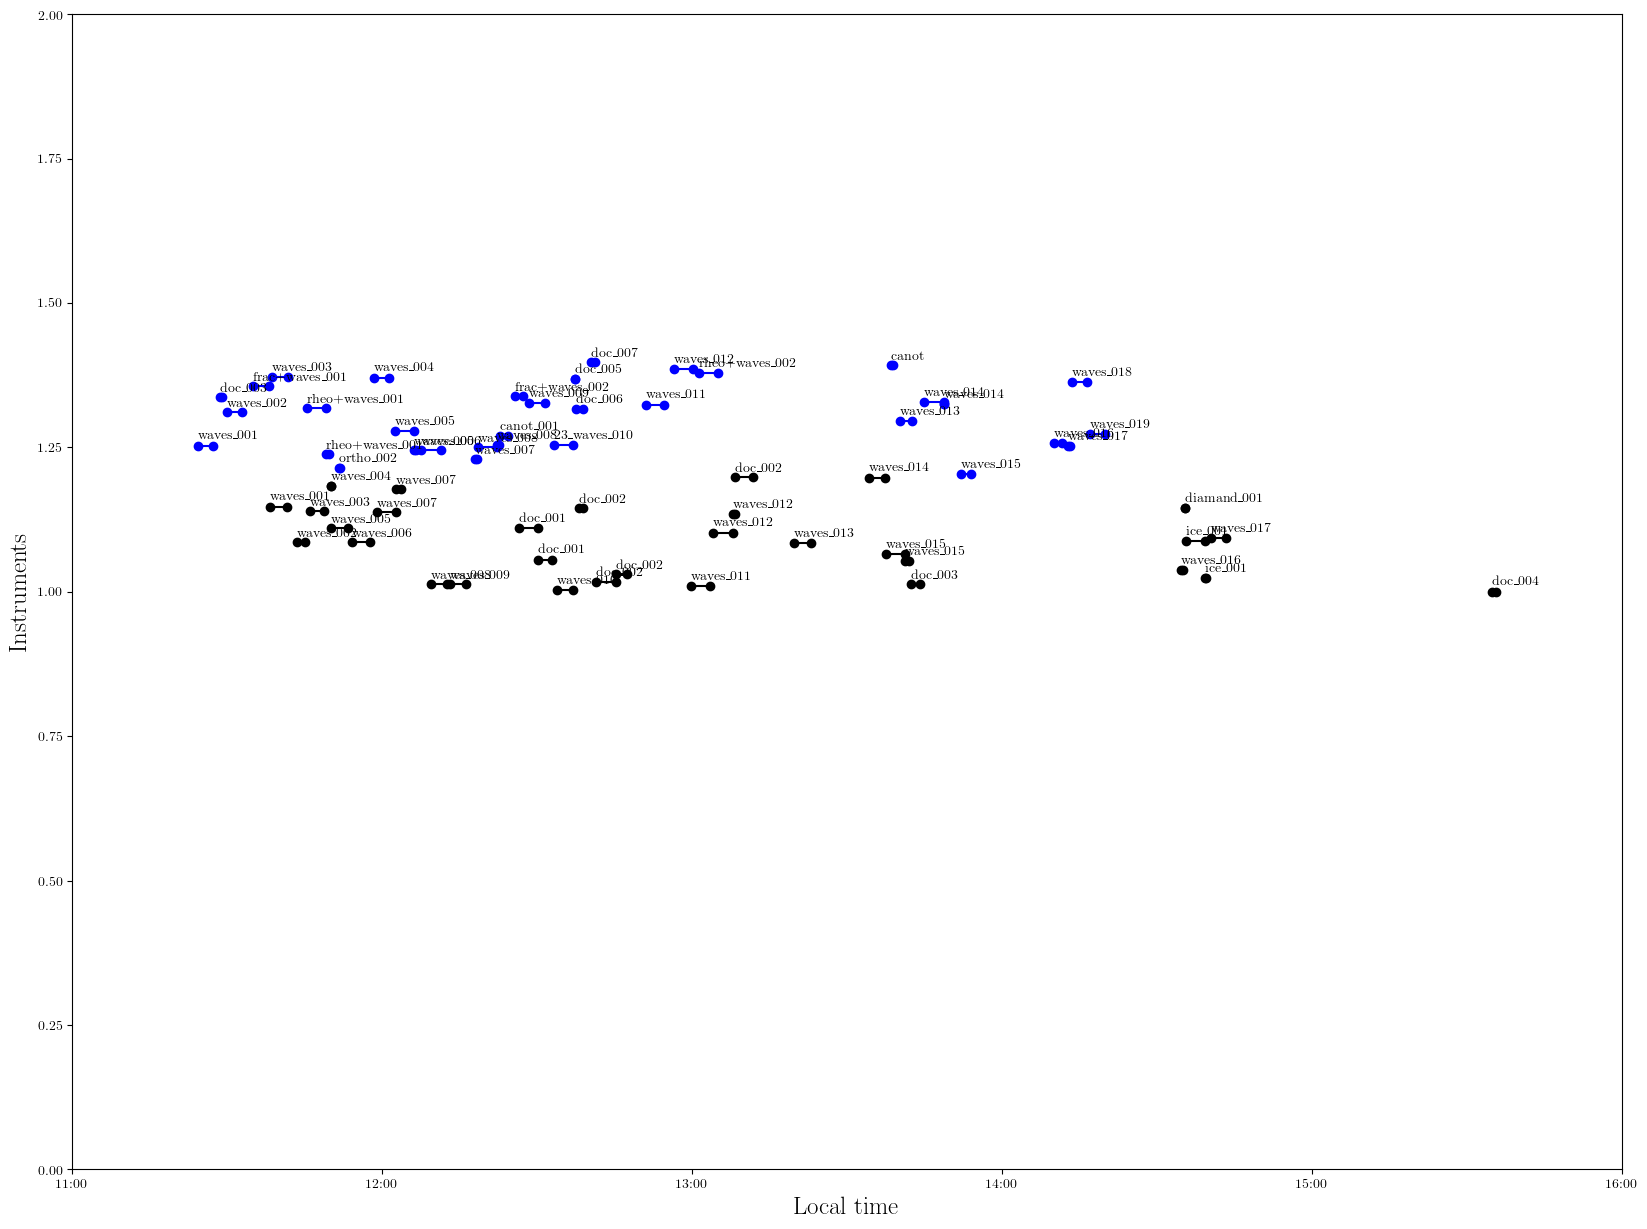

In [151]:
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)

import matplotlib.dates as mdates

b=0.2
for (record,name) in zip(records_b,srtfiles_bernache):
    try:
        title = name.split('/')[-2].split('-')[1]#.split('_')[0]
    except:
        title = name.split('/')[-2]

    times = [record[key]['time'] for key in record.keys()]
    x = [times[0],times[-1]]
    x = np.asarray([convert(x[0]),convert(x[1])])
    
    r=np.random.random()*b
    ax.plot(x/3600, [1+r,1+r],'ko-')
    #display_text(x,y,title,ax=ax)
    ax.text(x[0]/3600,1+0.01+r,title)
    #print(convert(x[0]))

for (record,name) in zip(records_m,srtfiles_mesange):
    try:
        title = name.split('/')[-2].split('-')[1]#.split('_')[0]
    except:
        title = name.split('/')[-2]

    times = [record[key]['time'] for key in record.keys()]
    x = [times[0],times[-1]]
    x = np.asarray([convert(x[0])-3600*6,convert(x[1])-3600*6])
    
    r=np.random.random()*b
    ax.plot(x/3600, [1+b+r,1+b+r],'bo-')
    ax.text(x[0]/3600,1+b+0.01+r,title)
    #print(convert(x[0]))
    
    
plt.ylim(0,2)
hours = [11,12,13,14,15,16]
ax.set_xticks(hours,[str(h)+':00' for h in hours])
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
#ax.set_xlim(['11:30:00','15:00:00'])
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%h-%m-%s'))
#fig.autofmt_xdate()

figs = graphes.legende('Local time','Instruments','')

In [152]:
date = '0223'
#srtfiles_bernache = glob.glob(base+date+'/Drones/Bernache/*/*.SRT')#/*/*.srt')


In [178]:
pprint(files_telephones)
data_phone = rw_data.read_csv(files_telephones[1])


['/Volumes/Hublot24/Share_hublot/Data/0223/Telephones/Bic24_S02_2024_0223/_Summary.csv',
 '/Volumes/Hublot24/Share_hublot/Data/0223/Telephones/Bic24_S02_2024_0223/averages_Summary.csv']


In [181]:
header = data_phone[0]
keys = header
phonedict = {}
for d in data_phone[1:]:
    phone = int(d[0])
    phonedict[phone]={}
    for i,key in enumerate(header):
        phonedict[phone][key]=d[i]

In [338]:
phonedict.keys()

dict_keys([0, 4, 6, 9, 11, 13, 16, 17, 18, 19])

In [344]:
pprint(phonedict[0].keys())

dict_keys(['Phone', 'ax_err', 'ax_w_mean', 'ax_high_mean', 'ax_trend_mean', 'ax_w_std', 'ax_high_std', 'ax_trend_std', 'ay_err', 'ay_w_mean', 'ay_high_mean', 'ay_trend_mean', 'ay_w_std', 'ay_high_std', 'ay_trend_std', 'az_err', 'az_w_mean', 'az_high_mean', 'az_trend_mean', 'az_w_std', 'az_high_std', 'az_trend_std', 'gx_err', 'gx_w_std', 'gx_high_std', 'gx_trend_std', 'gy_err', 'gy_w_std', 'gy_high_std', 'gy_trend_std', 'gz_err', 'gz_w_std', 'gz_high_std', 'gz_trend_std', 'mx_err', 'mx_w_mean', 'mx_high_mean', 'mx_trend_mean', 'mx_w_std', 'mx_high_std', 'mx_trend_std', 'my_err', 'my_w_mean', 'my_high_mean', 'my_trend_mean', 'my_w_std', 'my_high_std', 'my_trend_std', 'mz_err', 'mz_w_mean', 'mz_high_mean', 'mz_trend_mean', 'mz_w_std', 'mz_high_std', 'mz_trend_std', 'az_w_freq', 'elev_mean', 'elev_std', 'lat_mean', 'lat_std', 'lon_mean', 'lon_std', 'time_start', 'time_end'])


In [345]:
print(phonedict[0].keys())
for phone in phonedict.keys():
    print(phonedict[phone]['time_start'])#.keys())
    print(phonedict[phone]['time_end'])#.keys())

dict_keys(['Phone', 'ax_err', 'ax_w_mean', 'ax_high_mean', 'ax_trend_mean', 'ax_w_std', 'ax_high_std', 'ax_trend_std', 'ay_err', 'ay_w_mean', 'ay_high_mean', 'ay_trend_mean', 'ay_w_std', 'ay_high_std', 'ay_trend_std', 'az_err', 'az_w_mean', 'az_high_mean', 'az_trend_mean', 'az_w_std', 'az_high_std', 'az_trend_std', 'gx_err', 'gx_w_std', 'gx_high_std', 'gx_trend_std', 'gy_err', 'gy_w_std', 'gy_high_std', 'gy_trend_std', 'gz_err', 'gz_w_std', 'gz_high_std', 'gz_trend_std', 'mx_err', 'mx_w_mean', 'mx_high_mean', 'mx_trend_mean', 'mx_w_std', 'mx_high_std', 'mx_trend_std', 'my_err', 'my_w_mean', 'my_high_mean', 'my_trend_mean', 'my_w_std', 'my_high_std', 'my_trend_std', 'mz_err', 'mz_w_mean', 'mz_high_mean', 'mz_trend_mean', 'mz_w_std', 'mz_high_std', 'mz_trend_std', 'az_w_freq', 'elev_mean', 'elev_std', 'lat_mean', 'lat_std', 'lon_mean', 'lon_std', 'time_start', 'time_end'])
2024-02-23 18:47:40.664 UTC+01:00
2024-02-23 19:38:08.550 UTC+01:00
2024-02-23 18:47:43.879 UTC+01:00
2024-02-23 19:

18:47:40 19:38:08
18:47:43 19:36:04
18:47:37 19:40:04
18:47:41 19:40:58
18:47:27 19:41:14
05:57:50 06:53:09
18:47:15 19:43:19
18:47:12 19:43:16
06:05:16 06:59:53
18:47:36 19:43:07


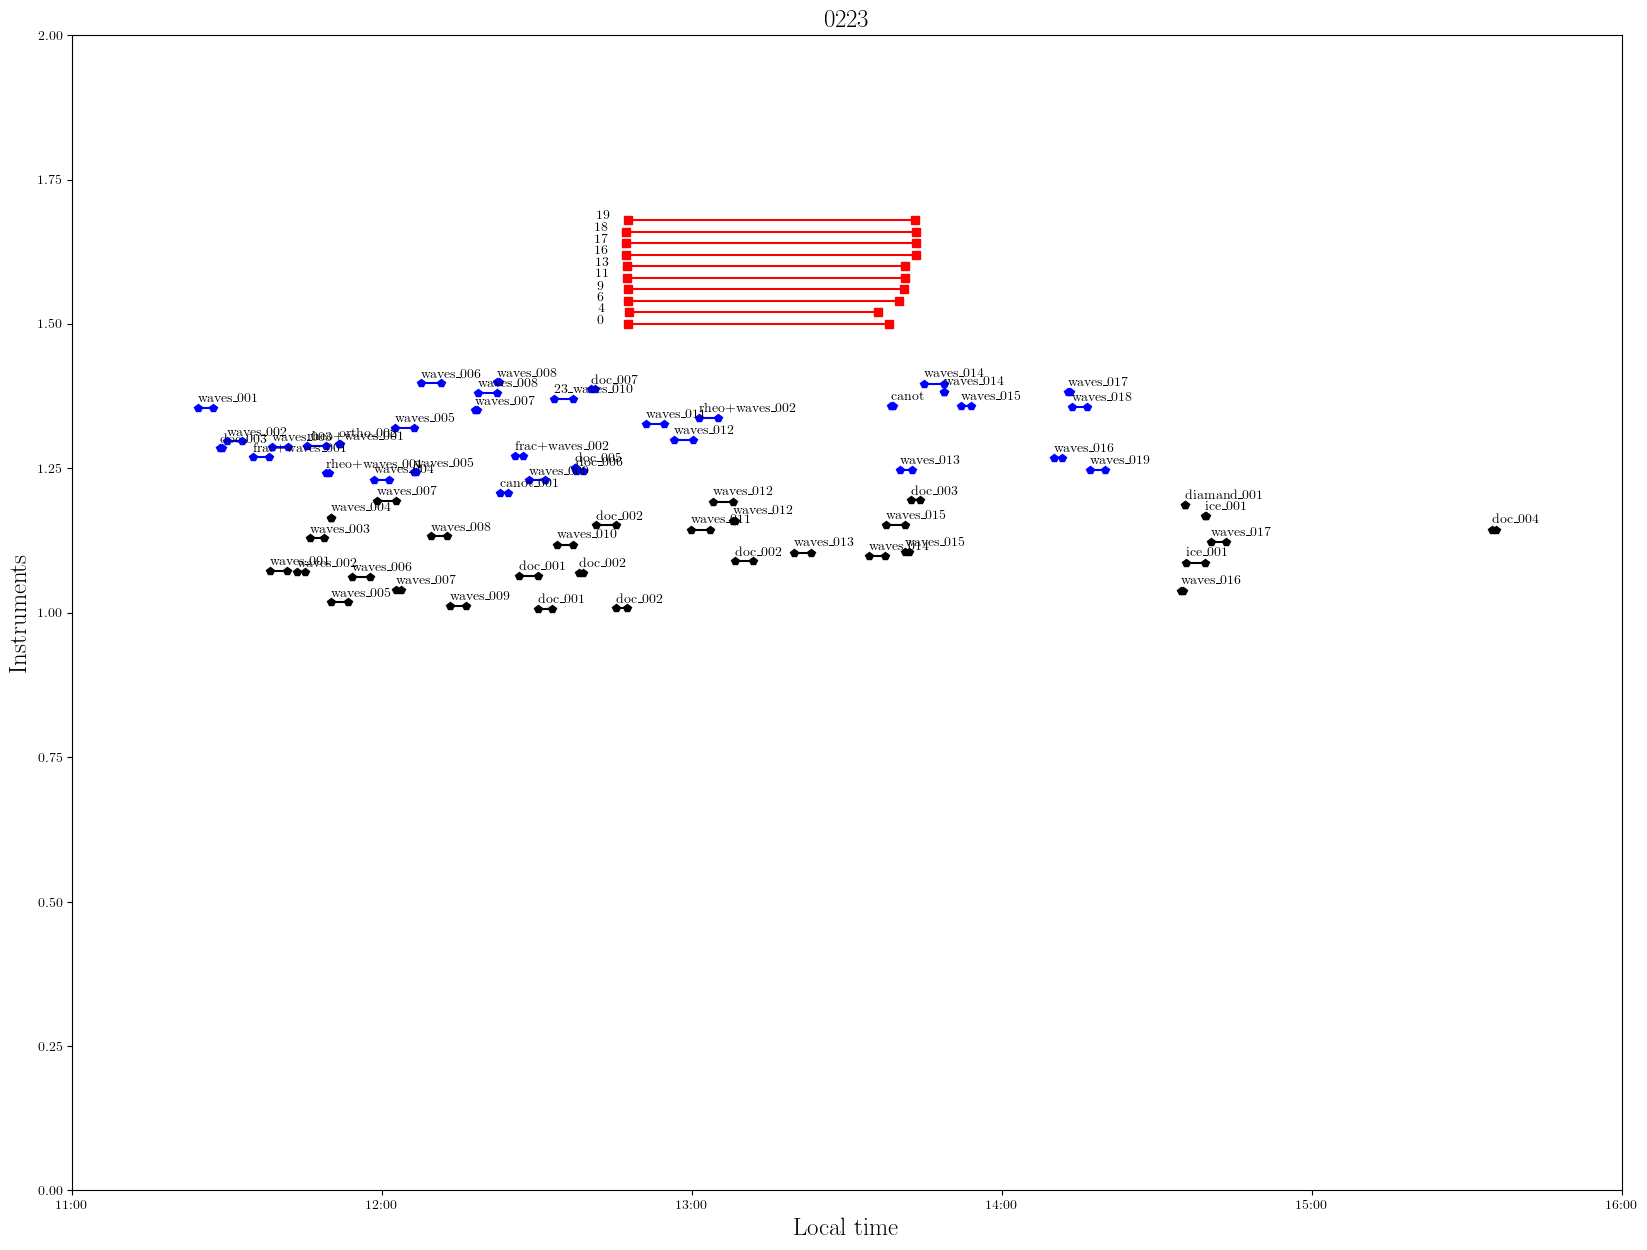

In [202]:
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)

import matplotlib.dates as mdates

b=0.2
for (record,name) in zip(records_b,srtfiles_bernache):
    try:
        title = name.split('/')[-2].split('-')[1]#.split('_')[0]
    except:
        title = name.split('/')[-2]

    times = [record[key]['time'] for key in record.keys()]
    x = [times[0],times[-1]]
    x = np.asarray([convert(x[0]),convert(x[1])])
    
    r=np.random.random()*b
    ax.plot(x/3600, [1+r,1+r],'kp-')
    #display_text(x,y,title,ax=ax)
    ax.text(x[0]/3600,1+0.01+r,title)
    #print(convert(x[0]))

for (record,name) in zip(records_m,srtfiles_mesange):
    try:
        title = name.split('/')[-2].split('-')[1]#.split('_')[0]
    except:
        title = name.split('/')[-2]

    times = [record[key]['time'] for key in record.keys()]
    x = [times[0],times[-1]]
    x = np.asarray([convert(x[0])-3600*6,convert(x[1])-3600*6])
    
    r=np.random.random()*b
    ax.plot(x/3600, [1+b+r,1+b+r],'bp-')
    ax.text(x[0]/3600,1+b+0.01+r,title)
    #print(convert(x[0]))
    
X = {}
for i,phone in enumerate(phonedict.keys()):
    t0 = phonedict[phone]['time_start'].split(' ')[1][:-4]#.keys())
    t1 = phonedict[phone]['time_end'].split(' ')[1][:-4]
    print(t0,t1)
    X[i] = np.asarray([convert(t0)-3600*6,convert(t1)-3600*6])
    
    if X[i][0]/3600<11:
        X[i]=X[i-1]
    r=i*0.02#np.random.random()*b
    ax.plot(X[i]/3600, [1.5+r,1.5+r],'rs-')
    ax.text(X[i][0]/3600-0.1,1.5+r,str(phone))

#    ax.plot()
    #.keys())
    
plt.ylim(0,2)
hours = [11,12,13,14,15,16]
ax.set_xticks(hours,[str(h)+':00' for h in hours])
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
#ax.set_xlim(['11:30:00','15:00:00'])
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%h-%m-%s'))
#fig.autofmt_xdate()

figs = graphes.legende('Local time','Instruments',date)

In [205]:
date = '0223'
files_geophones = glob.glob(base+date+'/Geophones/DigiSolo*.txt')#/*/*.srt')
#srtfiles_bernache = glob.glob(base+date+'/Drones/Bernache/*/*.SRT')#/*/*.srt')


In [426]:
def step2():
    return None
names = locals()['step2']
print(names)#.keys())

<function step2 at 0x13afc31a0>


In [206]:
pprint(files_geophones)

['/Volumes/Hublot24/Share_hublot/Data/0223/Geophones/DigiSolo_4075.txt',
 '/Volumes/Hublot24/Share_hublot/Data/0223/Geophones/DigiSolo_4177.txt',
 '/Volumes/Hublot24/Share_hublot/Data/0223/Geophones/DigiSolo_4180.txt',
 '/Volumes/Hublot24/Share_hublot/Data/0223/Geophones/DigiSolo_4265.txt',
 '/Volumes/Hublot24/Share_hublot/Data/0223/Geophones/DigiSolo_4274.txt',
 '/Volumes/Hublot24/Share_hublot/Data/0223/Geophones/DigiSolo_4514.txt',
 '/Volumes/Hublot24/Share_hublot/Data/0223/Geophones/DigiSolo_4765.txt',
 '/Volumes/Hublot24/Share_hublot/Data/0223/Geophones/DigiSolo_5132.txt',
 '/Volumes/Hublot24/Share_hublot/Data/0223/Geophones/DigiSolo_5137.txt',
 '/Volumes/Hublot24/Share_hublot/Data/0223/Geophones/DigiSolo_5165.txt',
 '/Volumes/Hublot24/Share_hublot/Data/0223/Geophones/DigiSolo_5167.txt',
 '/Volumes/Hublot24/Share_hublot/Data/0223/Geophones/DigiSolo_5235.txt',
 '/Volumes/Hublot24/Share_hublot/Data/0223/Geophones/DigiSolo_5251.txt',
 '/Volumes/Hublot24/Share_hublot/Data/0223/Geophone

In [240]:
geophones={}
for filename in files_geophones:
    num = filename.split('/DigiSolo_')[1].split('.txt')[0]
    print(num)
    geo = rw_data.read_csv(filename)
    geophones[num] = geo

4075
4177
4180
4265
4274
4514
4765
5132
5137
5165
5167
5235
5251
5291
5442
5450


In [330]:
len(exemple_geophone)

records_geo={}

for num in geophones.keys():
    geo = geophones[num]
    records_geo[num]={}
    for i,line in enumerate(geo[:-1]):
       ##print(line)
        l = geo[i+1]
        if len(l)>0:
            if 'Serial Number' in l[0]:
                serial = l[0].split(' = ')[1]
                print(serial)
            if 'Start Acquisition FileName' in l[0]:
                print(l[0])
                rec = int(l[0].split('Seis')[1].split('.DLD')[0])
                print(i)
                print(rec,l)
                records_geo[num][rec]={}
                print(line)
                records_geo[num][rec]['date']=line[0].split('= "')[1]
                records_geo[num][rec]['times']=[line[1][:-1]]

            elif len(line)>0:
                if 'RTC Time' in line[0] or 'UTC Time' in line[0]:
                    records_geo[num][rec]['times'].append(line[1][:-1])

453024075
453024075
Start Acquisition FileName = "Seis000.DLD"
133
0 ['Start Acquisition FileName = "Seis000.DLD"']
['UTC Time = "2024/02/09', '20:47:33"']
453024075
453024075
Start Acquisition FileName = "Seis001.DLD"
291
1 ['Start Acquisition FileName = "Seis001.DLD"']
['UTC Time = "2024/02/10', '12:42:00"']
453024075
Start Acquisition FileName = "Seis002.DLD"
391
2 ['Start Acquisition FileName = "Seis002.DLD"']
['UTC Time = "2024/02/10', '13:05:50"']
453024075
Start Acquisition FileName = "Seis003.DLD"
511
3 ['Start Acquisition FileName = "Seis003.DLD"']
['UTC Time = "2024/02/10', '13:33:34"']
453024075
Start Acquisition FileName = "Seis004.DLD"
655
4 ['Start Acquisition FileName = "Seis004.DLD"']
['UTC Time = "2024/02/10', '14:22:34"']
453024075
453024075
Start Acquisition FileName = "Seis005.DLD"
910
5 ['Start Acquisition FileName = "Seis005.DLD"']
['UTC Time = "2024/02/11', '18:43:33"']
453024075
Start Acquisition FileName = "Seis006.DLD"
986
6 ['Start Acquisition FileName = "Sei

In [244]:
pprint(records_geo.keys())

dict_keys(['4075', '4177', '4180', '4265', '4274', '4514', '4765', '5132', '5137', '5165', '5167', '5235', '5251', '5291', '5442', '5450'])


In [408]:
filename = '/Volumes/Hublot24/Share_hublot/Data/0223/Summary/records_0223.pkl'
records = rw_data.load_pkl(filename)
print(records.keys())

dict_keys(['mesange', 'Bernache', 'phones', 'geophones', 'buoys'])


In [411]:
for key in records.keys():
    record = records[key]
    for k in record.keys():
        pprint(k)

'04-waves_001'
'05-doc_003'
'06-waves_002'
'07-frac+waves_001'
'08-waves_003'
'10-rheo+waves_001'
'11-ortho_002'
'12-waves_004'
'13-waves_005'
'14-waves_006'
'17-waves_007'
'18-waves_008'
'19-canot_001'
'20-frac+waves_002'
'21-waves_009'
'23_waves_010'
'24-doc_005'
'25-doc_006'
'27-doc_007'
'28-waves_011'
'29-waves_012'
'30-rheo+waves_002'
'32-canot-002'
'34-waves_013'
'35-waves_014'
'37-waves_015'
'39-waves_016'
'40-waves_017'
'41-waves_018'
'42-waves_019'
'16-waves_011'
'17-waves_012'
'18-doc_002'
'20-waves_013'
'21-waves_014'
'22-waves_015'
'23-doc_003'
'25-waves_016'
'26-diamand_001'
'27-ice_001'
'28-waves_017'
'30-doc_004'
'02-waves_002'
'03-waves_003'
'04-waves_004'
'05-waves_005'
'06-waves_006'
'07-waves_007'
'08-waves_008'
'09-waves_009'
'11-doc_001'
'12-waves_010'
'13-doc_002'
'01-waves_001'
0
4
6
9
11
13
16
17
18
19
'4075'
'4177'
'4180'
'4265'
'4274'
'4514'
'4765'
'5132'
'5137'
'5165'
'5167'
'5235'
'5251'
'5291'
'5442'
'5450'
'B1'
'B2'
'B4'
'B5'


In [417]:
records['mesange']['04-waves_001'][0]['time']#.keys()

'17:24:23'

In [420]:
records.keys()

dict_keys(['mesange', 'Bernache', 'phones', 'geophones', 'buoys'])

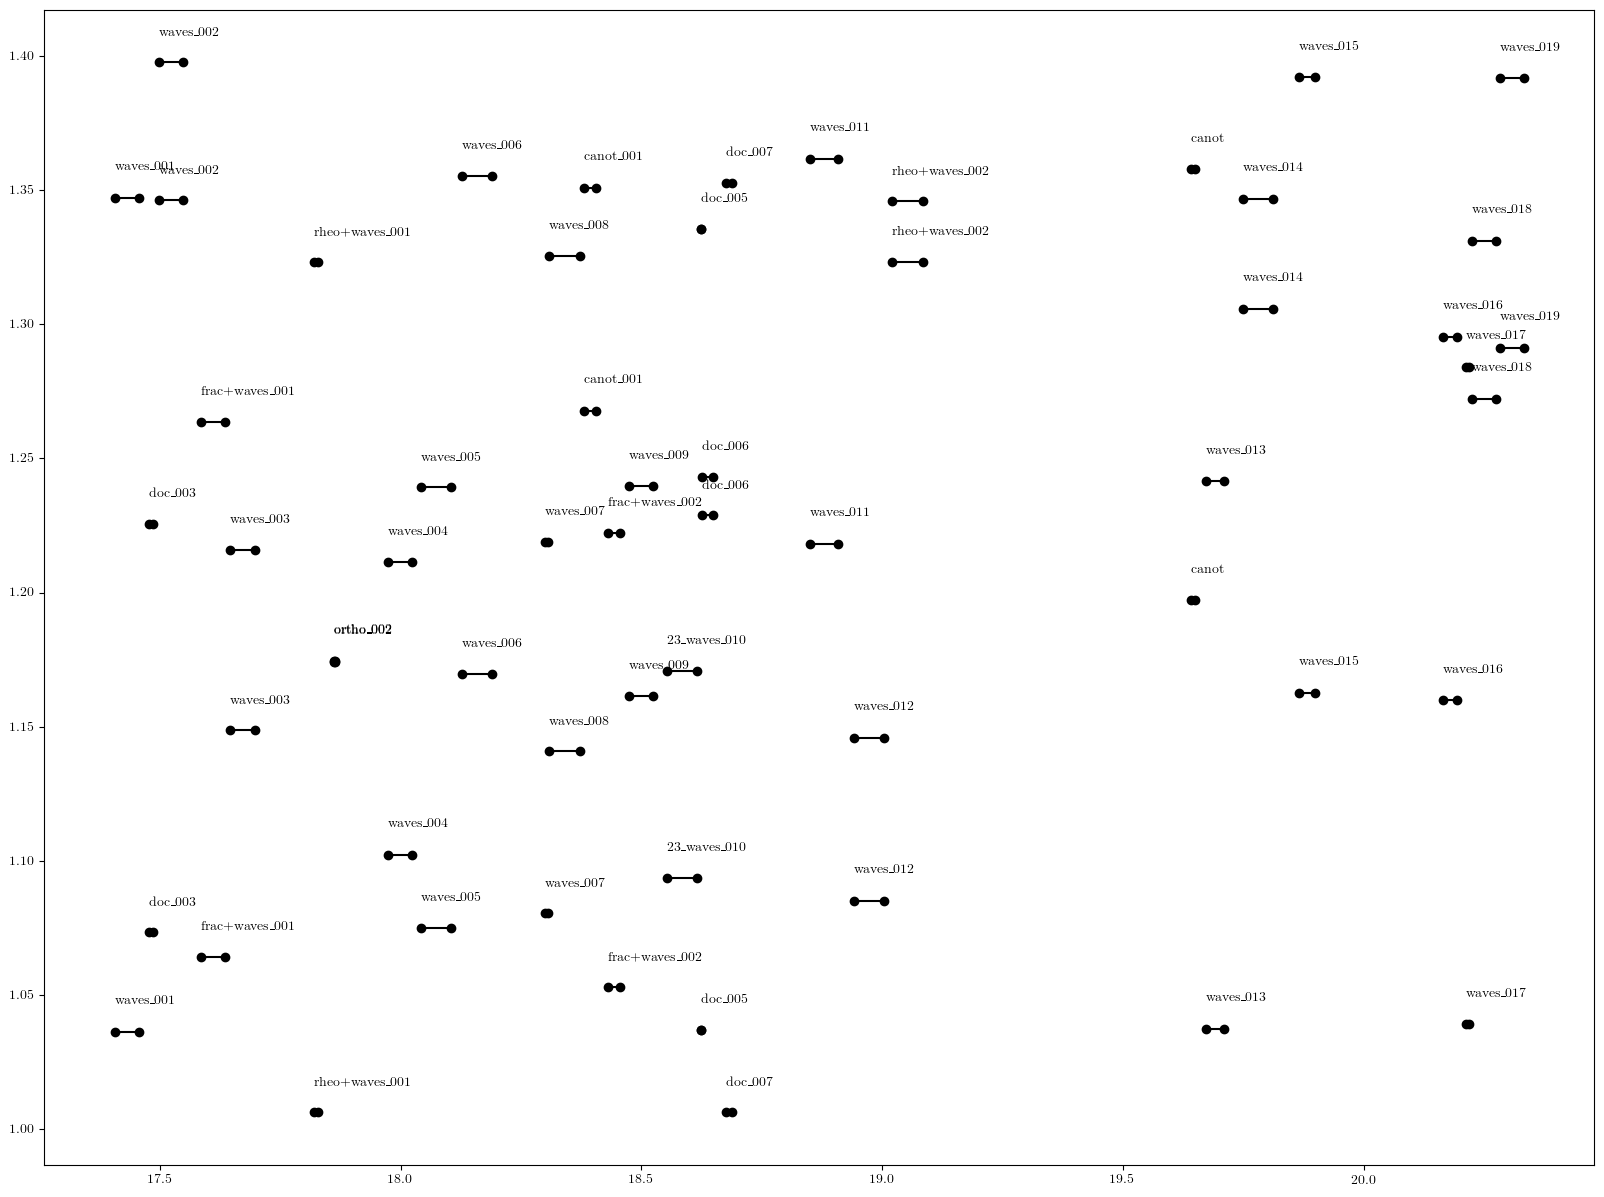

In [419]:
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)

import matplotlib.dates as mdates

colors = {}
for k in ['mesange','Bernache']:
    record = records['mesange']
    for name in record.keys():   
        try:
            title = name.split('-')[1]#.split('_')[0]
        except:
            title = name
        times = [record[name][key]['time'] for key in record[name].keys()]
        x = [times[0],times[-1]]
        x = np.asarray([convert(x[0]),convert(x[1])])

        r=np.random.random()*b
        ax.plot(x/3600, [1+r,1+r],color+symbol+'-')
        #display_text(x,y,title,ax=ax)
        ax.text(x[0]/3600,1+0.01+r,title)
        #print(convert(x[0]))


In [359]:
pprint(records_geo['4177'][14]['date'])
pprint(records_geo['4177'][14]['times'])

'2024/02/23'
['17:26:00',
 '17:33:52',
 '17:33:54',
 '17:35:56',
 '17:41:52',
 '17:41:54',
 '17:45:56',
 '17:50:02',
 '17:50:04',
 '17:55:56',
 '17:56:08',
 '17:58:09',
 '17:58:11',
 '18:06:15',
 '18:06:15',
 '18:06:17',
 '18:14:23',
 '18:14:23',
 '18:14:25',
 '18:16:25',
 '18:22:30',
 '18:22:32',
 '18:25:57',
 '18:26:34',
 '18:30:38',
 '18:30:40',
 '18:36:45',
 '18:38:46',
 '18:38:48',
 '18:46:57',
 '18:46:57',
 '18:46:59']


18:47:40 19:38:08
18:47:43 19:36:04
18:47:37 19:40:04
18:47:41 19:40:58
18:47:27 19:41:14
05:57:50 06:53:09
18:47:15 19:43:19
18:47:12 19:43:16
06:05:16 06:59:53
18:47:36 19:43:07


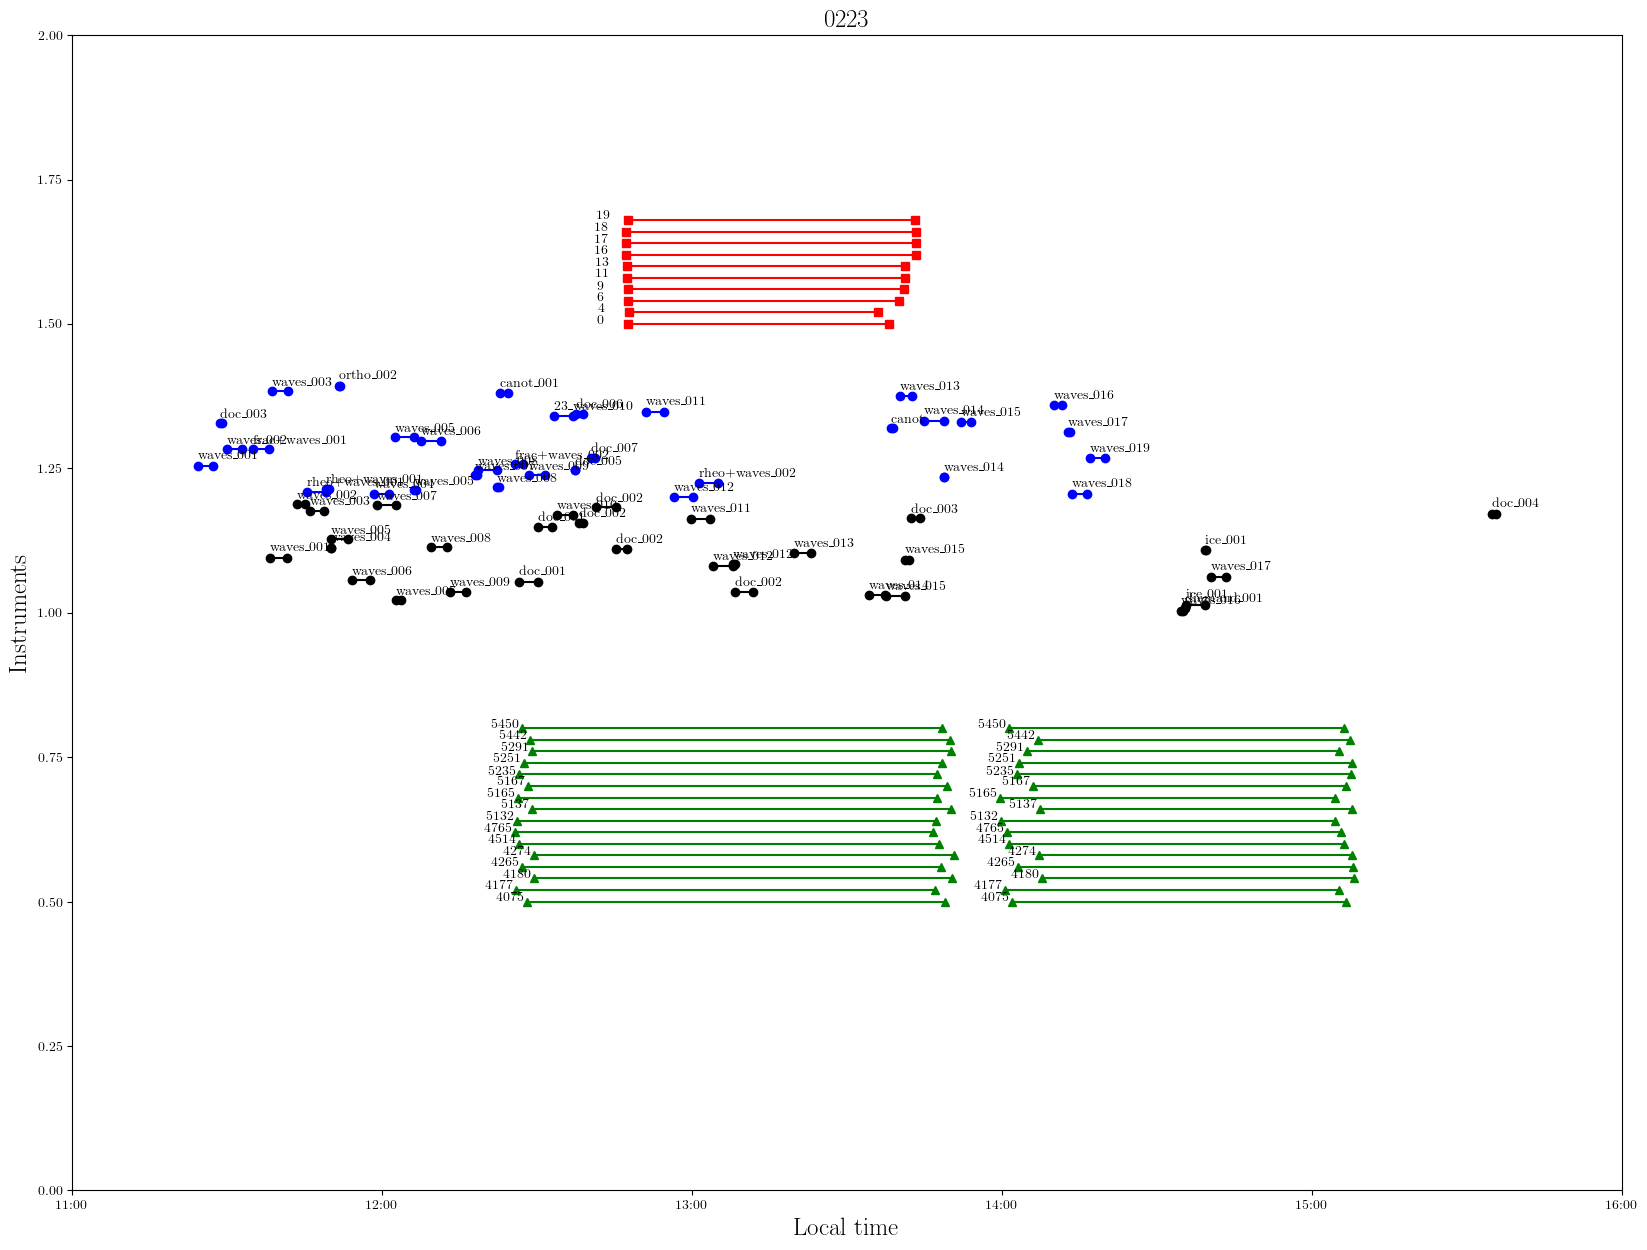

In [290]:
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)

import matplotlib.dates as mdates

b=0.2
for (record,name) in zip(records_b,srtfiles_bernache):
    try:
        title = name.split('/')[-2].split('-')[1]#.split('_')[0]
    except:
        title = name.split('/')[-2]

    times = [record[key]['time'] for key in record.keys()]
    x = [times[0],times[-1]]
    x = np.asarray([convert(x[0]),convert(x[1])])
    
    r=np.random.random()*b
    ax.plot(x/3600, [1+r,1+r],'ko-')
    #display_text(x,y,title,ax=ax)
    ax.text(x[0]/3600,1+0.01+r,title)
    #print(convert(x[0]))

for (record,name) in zip(records_m,srtfiles_mesange):
    try:
        title = name.split('/')[-2].split('-')[1]#.split('_')[0]
    except:
        title = name.split('/')[-2]

    times = [record[key]['time'] for key in record.keys()]
    x = [times[0],times[-1]]
    x = np.asarray([convert(x[0])-3600*6,convert(x[1])-3600*6])
    
    r=np.random.random()*b
    ax.plot(x/3600, [1+b+r,1+b+r],'bo-')
    ax.text(x[0]/3600,1+b+0.01+r,title)
    #print(convert(x[0]))
    
X = {}
for i,phone in enumerate(phonedict.keys()):
    t0 = phonedict[phone]['time_start'].split(' ')[1][:-4]#.keys())
    t1 = phonedict[phone]['time_end'].split(' ')[1][:-4]
    print(t0,t1)
    X[i] = np.asarray([convert(t0)-3600*6,convert(t1)-3600*6])
    
    if X[i][0]/3600<11:
        X[i]=X[i-1]
    r=i*0.02#np.random.random()*b
    ax.plot(X[i]/3600, [1.5+r,1.5+r],'rs-')
    ax.text(X[i][0]/3600-0.1,1.5+r,str(phone))

#    ax.plot()
    #.keys())

X={}
for i,num in enumerate(records_geo.keys()):
    for key in records_geo[num]:
        if records_geo[num][key]['date']=='2024/02/23':
            t0 = records_geo[num][key]['times'][0]
            t1 = records_geo[num][key]['times'][-1]
            
            X[num] = np.asarray([convert(t0)-3600*5,convert(t1)-3600*5])

            r=i*0.02#np.random.random()*b
            ax.plot(X[num]/3600, [0.5+r,0.5+r],'g^-')
            ax.text(X[num][0]/3600-0.1,0.5+r,num)

plt.ylim(0,2)
hours = [11,12,13,14,15,16]
ax.set_xticks(hours,[str(h)+':00' for h in hours])
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
#ax.set_xlim(['11:30:00','15:00:00'])
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%h-%m-%s'))
#fig.autofmt_xdate()

figs = graphes.legende('Local time','Instruments',date)

In [259]:
buoyfile = glob.glob('*.mat')[0]

import h5py

buoy = h5py.File(buoyfile)

In [289]:
buoy['IMU'].keys()
print(buoy['IMU']['UTC_TIME'].keys())

hours = buoy['IMU']['UTC_TIME']['HOUR'][:][0]#.keys()
mins = buoy['IMU']['UTC_TIME']['MIN'][:][0]#.keys()
secs = buoy['IMU']['UTC_TIME']['SEC'][:][0]#.keys()

times = [str(int(hour))+':'+str(int(m))+':'+str(sec).replace('.','')[:2] for (hour,m,sec) in zip(hours,mins,secs)]
pprint(times)

<KeysViewHDF5 ['CLOCK_STATUS', 'CRC', 'CRC_CALC', 'DAY', 'GPS_TOW', 'HOUR', 'MIN', 'MONTH', 'NANOSEC', 'SEC', 'TIME_STAMP', 'TS_fix', 'YEAR', 't', 'time']>
['17:34:30',
 '17:34:40',
 '17:34:50',
 '17:34:60',
 '17:34:70',
 '17:34:80',
 '17:34:90',
 '17:34:10',
 '17:34:90',
 '17:34:10',
 '17:34:10',
 '17:34:11',
 '17:34:12',
 '17:34:13',
 '17:34:14',
 '17:34:15',
 '17:34:16',
 '17:34:18',
 '17:34:19',
 '17:34:20',
 '17:34:21',
 '17:34:22',
 '17:34:23',
 '17:34:24',
 '17:34:25',
 '17:34:26',
 '17:34:27',
 '17:34:28',
 '17:34:29',
 '17:34:30',
 '17:34:31',
 '17:34:32',
 '17:34:33',
 '17:34:34',
 '17:34:35',
 '17:34:36',
 '17:34:37',
 '17:34:38',
 '17:34:39',
 '17:34:40',
 '17:34:41',
 '17:34:42',
 '17:34:43',
 '17:34:44',
 '17:34:45',
 '17:34:46',
 '17:34:47',
 '17:34:47',
 '17:34:48',
 '17:34:49',
 '17:34:50',
 '17:34:51',
 '17:34:52',
 '17:34:53',
 '17:34:54',
 '17:34:55',
 '17:34:56',
 '17:34:57',
 '17:34:58',
 '17:34:59',
 '17:35:00',
 '17:35:10',
 '17:35:20',
 '17:35:40',
 '17:35:50',

In [292]:
files_buoys = glob.glob(base+date+'/boueeVague/*/mat/*.mat')#/*/*.srt')
pprint(files_buoys)

['/Volumes/Hublot24/Share_hublot/Data/0223/boueeVague/B1/mat/buoy1_sbg_20240223_1700.mat',
 '/Volumes/Hublot24/Share_hublot/Data/0223/boueeVague/B1/mat/buoy1_sbg_20240223_1800.mat',
 '/Volumes/Hublot24/Share_hublot/Data/0223/boueeVague/B2/mat/buoy2_sbg_20240223_1700.mat',
 '/Volumes/Hublot24/Share_hublot/Data/0223/boueeVague/B2/mat/buoy2_sbg_20240223_1800.mat',
 '/Volumes/Hublot24/Share_hublot/Data/0223/boueeVague/B4/mat/buoy4_sbg_20240223_1700.mat',
 '/Volumes/Hublot24/Share_hublot/Data/0223/boueeVague/B4/mat/buoy4_sbg_20240223_1800.mat',
 '/Volumes/Hublot24/Share_hublot/Data/0223/boueeVague/B5/mat/buoy5_sbg_20240223_1700.mat',
 '/Volumes/Hublot24/Share_hublot/Data/0223/boueeVague/B5/mat/buoy5_sbg_20240223_1800.mat']


In [396]:
import icewave.field.buoys as buoys_read

records_buoys = buoys_read.get_records(date)

/Volumes/Hublot24/Share_hublot/Data/0223/boueeVague/B1/mat/buoy1_sbg_20240223_1700.mat
/Volumes/Hublot24/Share_hublot/Data/0223/boueeVague/B1/mat/buoy1_sbg_20240223_1800.mat
/Volumes/Hublot24/Share_hublot/Data/0223/boueeVague/B2/mat/buoy2_sbg_20240223_1700.mat
/Volumes/Hublot24/Share_hublot/Data/0223/boueeVague/B2/mat/buoy2_sbg_20240223_1800.mat
/Volumes/Hublot24/Share_hublot/Data/0223/boueeVague/B4/mat/buoy4_sbg_20240223_1700.mat
/Volumes/Hublot24/Share_hublot/Data/0223/boueeVague/B4/mat/buoy4_sbg_20240223_1800.mat
/Volumes/Hublot24/Share_hublot/Data/0223/boueeVague/B5/mat/buoy5_sbg_20240223_1700.mat
/Volumes/Hublot24/Share_hublot/Data/0223/boueeVague/B5/mat/buoy5_sbg_20240223_1800.mat


In [406]:
records_buoys['buoys']['B1'][0].keys()

dict_keys(['time', 'latitude', 'longitude'])

In [296]:
buoys={}
for filename in files_buoys:
    name = filename.split('/')[-3]
    print(name)
    if not name in buoys.keys():
        buoys[name]=[]
    data_buoy = h5py.File(filename)
    buoys[name].append(data_buoy)        

B1
B1
B2
B2
B4
B4
B5
B5


In [390]:
buoys['B1'][0]['IMU']['GPS1_POS'].keys()

<KeysViewHDF5 ['ALT', 'BASE_STATION_ID', 'CRC', 'CRC_CALC', 'DIFF_AGE', 'GPS_POS_STATUS', 'GPS_TOW', 'LAT', 'LONG', 'NUM_SV_USED', 'POS_ACC_ALT', 'POS_ACC_LAT', 'POS_ACC_LONG', 'TIME_STAMP', 'TS_fix', 'UNDULATION', 't', 'time']>

In [392]:
print(buoys['B1'][0]['IMU']['GPS1_POS']['LAT'][0])#.keys()
print(buoys['B1'][0]['IMU']['GPS1_POS']['LONG'][0])

[-68.8517424 -68.8517429 -68.8517428 ... -68.8517521 -68.8517522
 -68.8517523]


In [301]:
record_buoys={}
for name in buoys.keys():
    record_buoys[name]={}
    for i,buoy in enumerate(buoys[name]):
        record_buoys[name][i]={}
        hours = buoy['IMU']['UTC_TIME']['HOUR'][:][0]#.keys()
        mins = buoy['IMU']['UTC_TIME']['MIN'][:][0]#.keys()
        secs = buoy['IMU']['UTC_TIME']['SEC'][:][0]#.keys()
        times = [str(int(hour))+':'+str(int(m))+':'+str(sec).replace('.','')[:2] for (hour,m,sec) in zip(hours,mins,secs)]
        print(times[0],times[-1])
        record_buoys[name][i]['times']=times

17:34:30 17:59:55
17:59:56 18:42:27
17:35:54 17:59:58
17:59:59 18:42:39
17:37:58 18:0:20
18:0:30 18:40:10
17:40:20 17:59:56
17:59:57 18:36:54


In [305]:
pprint(record_buoys.keys())

dict_keys(['B1', 'B2', 'B4', 'B5'])


18:47:40 19:38:08
18:47:43 19:36:04
18:47:37 19:40:04
18:47:41 19:40:58
18:47:27 19:41:14
05:57:50 06:53:09
18:47:15 19:43:19
18:47:12 19:43:16
06:05:16 06:59:53
18:47:36 19:43:07
B1
B2
B4
B5


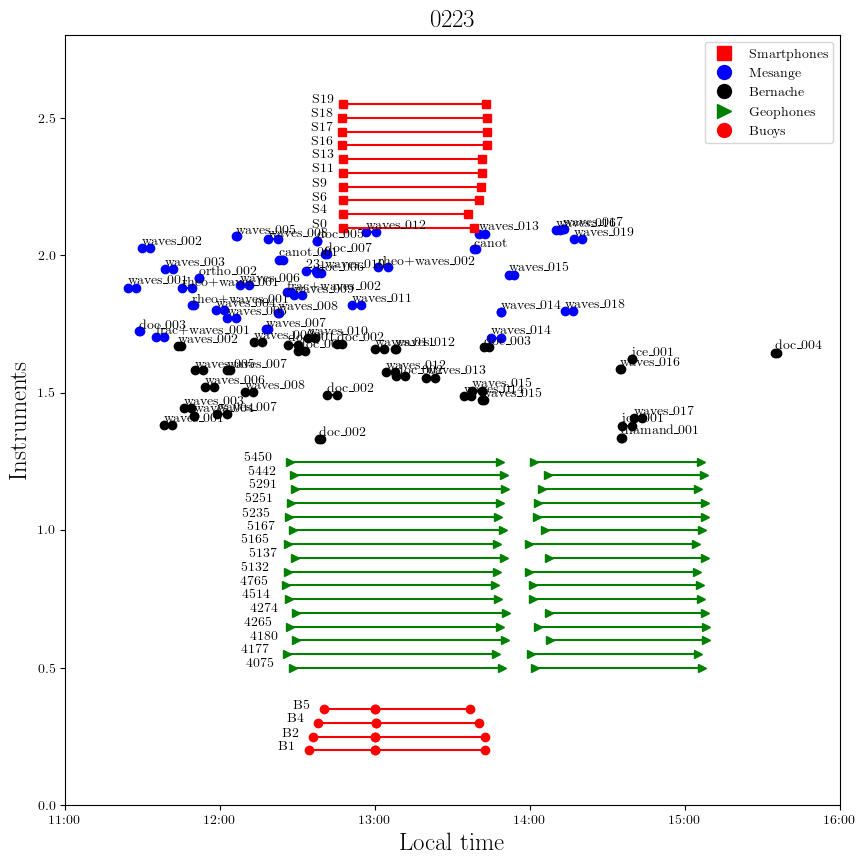

In [328]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

import matplotlib.dates as mdates

b=0.4
for (record,name) in zip(records_b,srtfiles_bernache):
    try:
        title = name.split('/')[-2].split('-')[1]#.split('_')[0]
    except:
        title = name.split('/')[-2]

    times = [record[key]['time'] for key in record.keys()]
    x = [times[0],times[-1]]
    x = np.asarray([convert(x[0]),convert(x[1])])
    
    r=np.random.random()*b
    y0 = 1.3
    ax.plot(x/3600, [y0+r,y0+r],'ko-')
    #display_text(x,y,title,ax=ax)
    ax.text(x[0]/3600,y0+0.01+r,title)
    #print(convert(x[0]))

for (record,name) in zip(records_m,srtfiles_mesange):
    try:
        title = name.split('/')[-2].split('-')[1]#.split('_')[0]
    except:
        title = name.split('/')[-2]

    times = [record[key]['time'] for key in record.keys()]
    x = [times[0],times[-1]]
    x = np.asarray([convert(x[0])-3600*6,convert(x[1])-3600*6])
    
    r=np.random.random()*b
    ax.plot(x/3600, [y0+b+r,y0+b+r],'bo-')
    ax.text(x[0]/3600,y0+b+0.01+r,title)
    #print(convert(x[0]))
    
X = {}
for i,phone in enumerate(phonedict.keys()):
    t0 = phonedict[phone]['time_start'].split(' ')[1][:-4]#.keys())
    t1 = phonedict[phone]['time_end'].split(' ')[1][:-4]
    print(t0,t1)
    X[i] = np.asarray([convert(t0)-3600*6,convert(t1)-3600*6])
    
    if X[i][0]/3600<11:
        X[i]=X[i-1]
    r=i*0.05#np.random.random()*b
    ax.plot(X[i]/3600, [2.1+r,2.1+r],'rs-')
    ax.text(X[i][0]/3600-0.2,2.1+r,'S'+str(phone))

#    ax.plot()
    #.keys())

X={}
first={}
for num in records_geo.keys():
    first[num]=True
for i,num in enumerate(records_geo.keys()):
    for key in records_geo[num]:
        if records_geo[num][key]['date']=='2024/02/23':

            t0 = records_geo[num][key]['times'][0]
            t1 = records_geo[num][key]['times'][-1]
            
            X[num] = np.asarray([convert(t0)-3600*5,convert(t1)-3600*5])

            r=i*0.05#np.random.random()*b
            ax.plot(X[num]/3600, [0.5+r,0.5+r],'g>-')
            if first[num]:
                ax.text(X[num][0]/3600-0.3,0.5+r,num)
                first[num]=False

            
for i,name in enumerate(record_buoys.keys()):
    print(name)
    for j,key in enumerate(record_buoys[name].keys()):
        t0 = record_buoys[name][key]['times'][0]
        t1 = record_buoys[name][key]['times'][-1]    
        
        X[num] = np.asarray([convert(t0)-3600*5,convert(t1)-3600*5])

        r=i*0.05#np.random.random()*b
        ax.plot(X[num]/3600, [0.2+r,0.2+r],'ro-')
        if j==0:
            ax.text(X[num][0]/3600-0.2,0.2+r,name)

plt.ylim(0,2.8)
hours = [11,12,13,14,15,16]
ax.set_xticks(hours,[str(h)+':00' for h in hours])


from matplotlib.lines import Line2D


# access legend objects automatically created from data
handles, labels = plt.gca().get_legend_handles_labels()
# create manual symbols for legend
#patch = mpatches.Patch(color='grey', label='manual patch')   
#line = Line2D([0], [0], label='manual line', color='k')
names = {'Smartphones':('r','s'),'Mesange':('b','o'),'Bernache':('k','o'),'Geophones':('g','>'),'Buoys':('r','o')}
legends = []
for key in names.keys():
    point = Line2D([0], [0], label=key, marker=names[key][1], markersize=10, 
         markeredgecolor=names[key][0], markerfacecolor=names[key][0], linestyle='')
    legends.append(point)

# add manual symbols to auto legend
handles.extend(legends)

plt.legend(handles=handles)
#plt.show()


#ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
#ax.set_xlim(['11:30:00','15:00:00'])
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%h-%m-%s'))
#fig.autofmt_xdate()

figs = graphes.legende('Local time','Instruments',date)
graphes.save_figs(figs,savedir=savefolder,overwrite=True)
graphes.save_figs(figs,savedir=savefolder_local,overwrite=True,prefix=date+'_')

In [273]:
datas = {}

for i,(result,head) in enumerate(zip(results,headers)):
    header = result[0]
    core = result[1:]
    #print(core)

    try:
        print(np.asarray(core).shape)
    except:
        lengths = [len(c) for c in core]
        print(lengths)
        n = np.max(lengths)
        indices = np.where(lengths<n)[0]
        
        for indice in indices[::-1]:
            print("Missing data for phone : "+str(core[indice][0]))
            print(indice)
            del core[indice]
        
        lengths = [len(c) for c in core]
        print(lengths)

    data={}
    data['d']={}
    for j,key in enumerate(header):
        data['d'][key]=np.asarray(core)[:,j]
        data['date']=head['date']
        data['name']=head['name']

    datas[i]=data

(12, 62)
(13, 62)
(10, 62)
[62, 56, 62, 62, 62, 62, 62, 62, 62, 62, 62]
Missing data for phone : 1
1
[62, 62, 62, 62, 62, 62, 62, 62, 62, 62]


In [274]:
pprint(data['d'].keys())

dict_keys(['Phone', 'ax_err', 'ax_w_mean', 'ax_high_mean', 'ax_trend_mean', 'ax_w_std', 'ax_high_std', 'ax_trend_std', 'ay_err', 'ay_w_mean', 'ay_high_mean', 'ay_trend_mean', 'ay_w_std', 'ay_high_std', 'ay_trend_std', 'az_err', 'az_w_mean', 'az_high_mean', 'az_trend_mean', 'az_w_std', 'az_high_std', 'az_trend_std', 'gx_err', 'gx_w_std', 'gx_high_std', 'gx_trend_std', 'gy_err', 'gy_w_std', 'gy_high_std', 'gy_trend_std', 'gz_err', 'gz_w_std', 'gz_high_std', 'gz_trend_std', 'mx_err', 'mx_w_mean', 'mx_high_mean', 'mx_trend_mean', 'mx_w_std', 'mx_high_std', 'mx_trend_std', 'my_err', 'my_w_mean', 'my_high_mean', 'my_trend_mean', 'my_w_std', 'my_high_std', 'my_trend_std', 'mz_err', 'mz_w_mean', 'mz_high_mean', 'mz_trend_mean', 'mz_w_std', 'mz_high_std', 'mz_trend_std', 'az_w_freq', 'elev_mean', 'elev_std', 'lat_mean', 'lat_std', 'lon_mean', 'lon_std'])


In [292]:
pprint(datas[2]['d']['az_w_freq'])

array([0.07057639, 0.06704901, 0.07124301, 0.07095251, 0.06887194,
       0.07250722, 0.06366642, 0.06932231, 0.07318105, 0.06787604])


In [260]:
datas.keys()

dict_keys([0, 1, 2, 3])

In [276]:
datas[0].keys()
data = datas[0]

for k in datas.keys():
    data = datas[k]['d']
    for key in data.keys():
        if key == 'Phone':
            data[key] = data[key].astype(int)
        else:
            data[key] = data[key].astype(float)
    datas[k]['d']=data

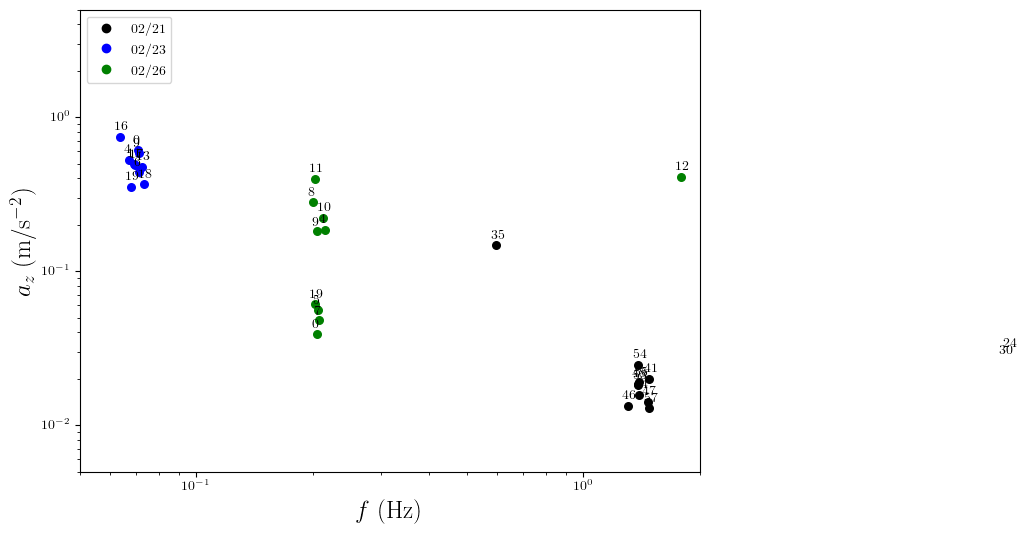

In [287]:
import matplotlib.lines as mlines


fig,ax = plt.subplots(figsize=(8,6))


varx = 'x'
vary = 'z'
xth = np.logspace(-3,0,100)

colors = ['k','r','b','g']
marker = 'o'
patches= []
for k in datas.keys():
    data = datas[k]['d']
    date = datas[k]['date']
    if date=='0221':
        name = datas[k]['name'].split('_')[-1]
        if name=='withgeophones':
            continue
    date = date[:2]+'/'+date[-2:]
    color = colors[k]
    xs = data[f'az_w_freq']
    ys = data[f'a{vary}_w_std']
    for i,(x,y) in enumerate(zip(xs,ys)):
        phone = data['Phone'][i]
        ax.scatter(x,y,marker=marker,color=color,s=30)
        ax.text(x*0.97,y*1.1,phone)

    ax.set_xlim(0.05,2)
    ax.set_ylim(0.005,5)
    
    patch = mlines.Line2D([], [], color=color, marker=marker,markersize=6,linestyle='None', label=date)
#    patch = mpatches.Patch(color=color, label=k)
    patches.append(patch)

#    patch = mlines.Line2D([], [], color=color, marker=marker,markersize=6,linestyle='None', label=date)
#    patch = mpatches.Patch(color=color, label=k)
#    patches.append(patch)

ax.legend(handles=patches,loc='upper left')
    #ax.plot(xth,xth*4,'r--')
ax.set_xscale('log')
ax.set_yscale('log')
figs = graphes.legende(f'$f$ (Hz)',r'$a_{'+vary+r'}$ (m/s$^{-2}$)','')
#graphes.save_figs(figs,savedir=savefolder,prefix='Bic_February_')

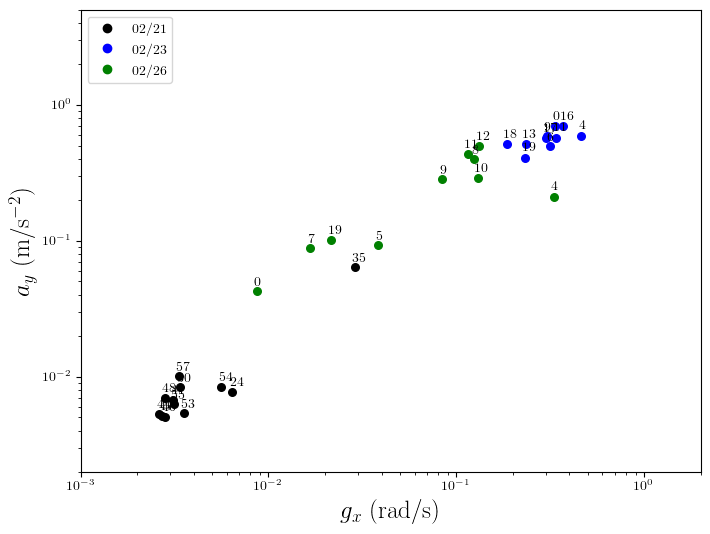

In [263]:
import matplotlib.lines as mlines


fig,ax = plt.subplots(figsize=(8,6))


varx = 'x'
vary = 'y'
xth = np.logspace(-3,0,100)

colors = ['k','r','b','g']
marker = 'o'
patches= []
for k in datas.keys():
    data = datas[k]['d']
    date = datas[k]['date']
    if date=='0221':
        name = datas[k]['name'].split('_')[-1]
        if name=='withgeophones':
            continue
    date = date[:2]+'/'+date[-2:]
    color = colors[k]
    xs = data[f'g{varx}_w_std']
    ys = data[f'a{vary}_w_std']
    for i,(x,y) in enumerate(zip(xs,ys)):
        phone = data['Phone'][i]
        ax.scatter(x,y,marker=marker,color=color,s=30)
        ax.text(x*0.97,y*1.1,phone)

    ax.set_xlim(0.001,2)
    ax.set_ylim(0.002,5)
    
    patch = mlines.Line2D([], [], color=color, marker=marker,markersize=6,linestyle='None', label=date)
#    patch = mpatches.Patch(color=color, label=k)
    patches.append(patch)

ax.legend(handles=patches,loc='upper left')
    #ax.plot(xth,xth*4,'r--')
ax.set_xscale('log')
ax.set_yscale('log')
figs = graphes.legende(f'$g_{varx}$ (rad/s)',r'$a_{'+vary+r'}$ (m/s$^{-2}$)','')
#graphes.save_figs(figs,savedir=savefolder,prefix='Bic_February_')

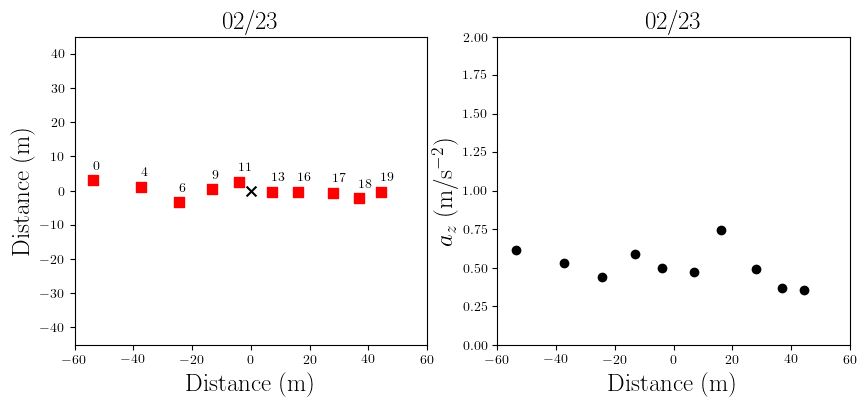

In [266]:
import matplotlib.lines as mlines
import matplotlib.patches as plt_patches

import icewave.gps.gps as gps
fig,axs = plt.subplots(figsize=(10,4),ncols=2)

k = 2

colors = ['k','r','b','g']
marker = 'o'
patches= []
data = datas[k]['d']
date = datas[k]['date']
date_raw = date

date = date[:2]+'/'+date[-2:]
color = colors[k]
xs = data[f'lon_mean']
ys = data[f'lat_mean']

radius = 6371*10**3
[xs,ys] = gps.project(xs,ys)

xs = xs*radius*np.pi*2
ys = ys*radius*np.pi*2
xs = xs - np.mean(xs)
ys = ys - np.mean(ys)


#print(ys*radius-np.mean(ys*radius))
#stdxs = data[f'lon_std']
#stdys = data[f'lat_std']
#[stdxs,stdys] = gps.project(stdxs,stdys)

for i,(x,y,stdx,stdy) in enumerate(zip(xs,ys,stdxs,stdys)):
    phone = data['Phone'][i]
    axs[0].scatter(x,y,marker='s',color='r',s=50)
    #ellipse = plt_patches.Ellipse((x,y), stdx/10, stdy/10,color=color,fill=False)
    axs[0].text(x,y+3,phone)
    #ax.add_artist(ellipse)
    

axs[0].scatter(0,0,marker='x',color='k',s=50)
axs[0].set_xlim(-60,60)
axs[0].set_ylim(-45,45)

#patch = mlines.Line2D([], [], color=color, marker=marker,markersize=6,linestyle='None', label=date)
#    patch = mpatches.Patch(color=color, label=k)
#patches.append(patch)

#ax.legend(handles=patches,loc='upper left')
#ax.plot(xth,xth*4,'r--')
#ax.set_xscale('log')
#ax.set_yscale('log')
figs = graphes.legende(f'Distance (m)',f'Distance (m)',date,ax=axs[0])

#second axis

ys = data['az_w_std']
axs[1].plot(xs,ys,'ko')
axs[1].set_xlim(-60,60)
axs[1].set_ylim(0,2)

figs = graphes.legende(f'Distance (m)',r'$a_z$ (m/s$^{-2})$',date,ax=axs[1])
#graphes.save_figs(figs,savedir=savefolder,prefix='Bic_February_'+date_raw+'_map_1_damping')
#graphes.save_figs(figs,savedir=savefolder_local,prefix='Bic_February_'+date_raw+'_map_1_damping')

-0.12486063502728939 32.08511711284518
1.4507332872599363 21.194708129391074
1.9303707610815763 13.208891410380602
0.8693295381963253 5.180058594793081
-0.3667992502450943 1.8613753821700811
-1.2728367000818253 -3.8115324545651674
-0.21974832750856876 -4.34381022118032
-1.3086165077984333 -4.702623529359698
-0.43888182006776333 -12.774537844583392
-0.2851772475987673 -13.721014700829983


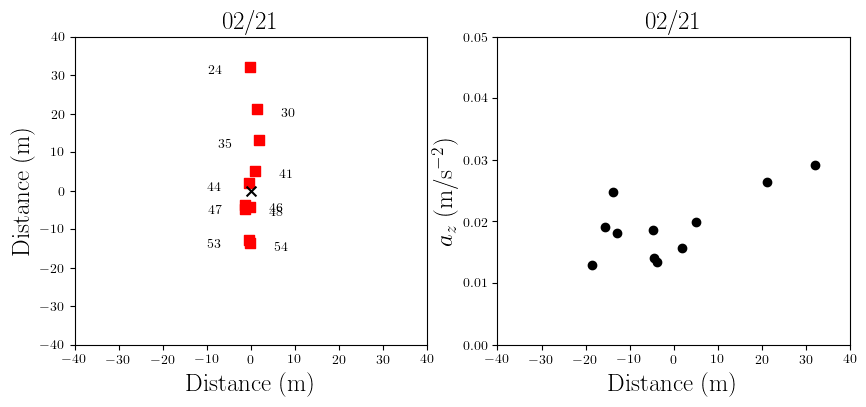

In [268]:
import matplotlib.lines as mlines
import matplotlib.patches as plt_patches

import icewave.gps.gps as gps
fig,axs = plt.subplots(figsize=(10,4),ncols=2)

k = 0

colors = ['k','r','b','g']
marker = 'o'
patches= []
data = datas[k]['d']
date = datas[k]['date']
date_raw = date

date = date[:2]+'/'+date[-2:]
color = colors[k]
xs = data[f'lon_mean']
ys = data[f'lat_mean']

radius = 6371*10**3
[xs,ys] = gps.project(xs,ys)

xs = xs*radius*np.pi*2
ys = ys*radius*np.pi*2
xs = xs - np.mean(xs)
ys = ys - np.mean(ys)


#print(ys*radius-np.mean(ys*radius))
#stdxs = data[f'lon_std']
#stdys = data[f'lat_std']
#[stdxs,stdys] = gps.project(stdxs,stdys)

for i,(x,y,stdx,stdy) in enumerate(zip(xs,ys,stdxs,stdys)):
    phone = data['Phone'][i]
    print(x,y)
    axs[0].scatter(x,y,marker='s',color='r',s=50)
    #ellipse = plt_patches.Ellipse((x,y), stdx/10, stdy/10,color=color,fill=False)
    axs[0].text(x-2+15*(i%2-1./2),y-2,phone)
    #ax.add_artist(ellipse)
    

axs[0].scatter(0,0,marker='x',color='k',s=50)
axs[0].set_ylim(-40,40)
axs[0].set_xlim(-40,40)

#patch = mlines.Line2D([], [], color=color, marker=marker,markersize=6,linestyle='None', label=date)
#    patch = mpatches.Patch(color=color, label=k)
#patches.append(patch)
figs = graphes.legende(f'Distance (m)',f'Distance (m)',date,ax=axs[0])


xs = data['az_w_std']
axs[1].plot(ys,xs,'ko')
axs[1].set_xlim(-40,40)
axs[1].set_ylim(0,0.05)


figs = graphes.legende(f'Distance (m)',r'$a_z$ (m/s$^{-2})$',date,ax=axs[1])

#ax.legend(handles=patches,loc='upper left')
#ax.plot(xth,xth*4,'r--')
#ax.set_xscale('log')
#ax.set_yscale('log')
#graphes.save_figs(figs,savedir=savefolder,prefix='Bic_February_'+date_raw+'_map')
#graphes.save_figs(figs,savedir=savefolder_local,prefix='Bic_February_'+date_raw+'_map')

-147.64154233969748 -17.366646338254213
-139.11361201666296 50.203746208921075
-105.02592387422919 6.919953037053347
-50.89605373702943 -4.907342197373509
-65.33172775618732 39.049010725691915
-63.85729024372995 -72.21809195913374
-16.824054639786482 -42.26780475489795
18.761812841519713 -14.537944007664919
28.75070388801396 -39.021756725385785
541.1776879001409 94.14687601290643


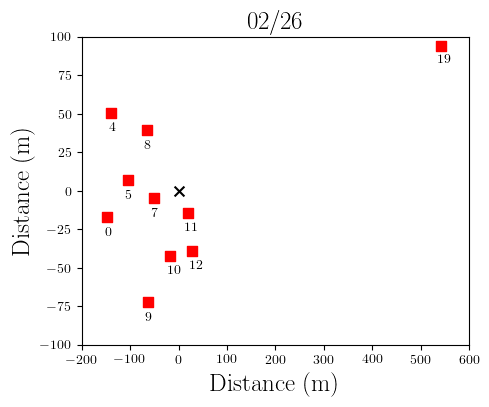

In [206]:
import matplotlib.lines as mlines
import matplotlib.patches as plt_patches

import icewave.gps.gps as gps
fig,ax = plt.subplots(figsize=(5,4))

k = 3

colors = ['k','r','b','g']
marker = 'o'
patches= []
data = datas[k]['d']
date = datas[k]['date']
date_raw = date

date = date[:2]+'/'+date[-2:]
color = colors[k]
xs = data[f'lon_mean']
ys = data[f'lat_mean']

radius = 6371*10**3
[xs,ys] = gps.project(xs,ys)

xs = xs*radius*np.pi*2
ys = ys*radius*np.pi*2
xs = xs - np.mean(xs)
ys = ys - np.mean(ys)


#print(ys*radius-np.mean(ys*radius))
#stdxs = data[f'lon_std']
#stdys = data[f'lat_std']
#[stdxs,stdys] = gps.project(stdxs,stdys)

for i,(x,y,stdx,stdy) in enumerate(zip(xs,ys,stdxs,stdys)):
    phone = data['Phone'][i]
    print(x,y)
    ax.scatter(x,y,marker='s',color='r',s=50)
    #ellipse = plt_patches.Ellipse((x,y), stdx/10, stdy/10,color=color,fill=False)
    ax.text(x-5,y-12,phone)
    #ax.add_artist(ellipse)
    

ax.scatter(0,0,marker='x',color='k',s=50)
ax.set_xlim(-200,600)
ax.set_ylim(-100,100)

#patch = mlines.Line2D([], [], color=color, marker=marker,markersize=6,linestyle='None', label=date)
#    patch = mpatches.Patch(color=color, label=k)
#patches.append(patch)

#ax.legend(handles=patches,loc='upper left')
#ax.plot(xth,xth*4,'r--')
#ax.set_xscale('log')
#ax.set_yscale('log')
figs = graphes.legende(f'Distance (m)',f'Distance (m)',date)
graphes.save_figs(figs,savedir=savefolder,prefix='Bic_February_'+date_raw+'_map')